<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Polynomial Regression with Evaluation Methods


This notebook allows students to explore **Linear Regression** and **Polynomial Regression** models using different evaluation techniques.
We will apply **Holdout** and **K-Fold Cross-Validation** methods to evaluate the models' performance, and we will measure the error using **Root Mean Squared Error (RMSE)** and **R-squared (R2)** metrics.


## Step 1: Create a Synthetic Dataset

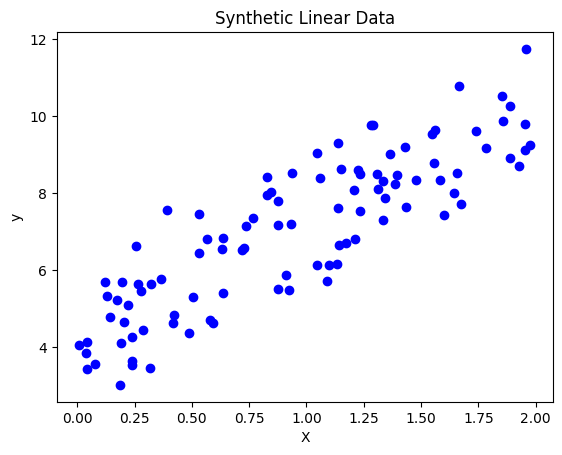

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Create synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.show()


## Step 2: Linear Regression with Holdout Validation

In [2]:

# Split data into training and testing sets (Holdout method)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RMSE and R2 for Training and Testing
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

print("Linear Regression with Holdout Validation")
print("Training RMSE:", rmse_train)
print("Training R2:", r2_train)
print("Testing RMSE:", rmse_test)
print("Testing R2:", r2_test)


Linear Regression with Holdout Validation
Training RMSE: 1.00565207255927
Training R2: 0.7597598292034167
Testing RMSE: 0.9579943877557056
Testing R2: 0.6521157503858556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Step 3: Polynomial Regression with Holdout Validation

In [3]:

# Polynomial Features Transformation
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predictions and Evaluation
y_poly_pred_train = poly_reg.predict(X_poly_train)
y_poly_pred_test = poly_reg.predict(X_poly_test)

# RMSE and R2 for Training and Testing
rmse_poly_train = mean_squared_error(y_train, y_poly_pred_train, squared=False)
r2_poly_train = r2_score(y_train, y_poly_pred_train)
rmse_poly_test = mean_squared_error(y_test, y_poly_pred_test, squared=False)
r2_poly_test = r2_score(y_test, y_poly_pred_test)

print("Polynomial Regression with Holdout Validation")
print("Training RMSE:", rmse_poly_train)
print("Training R2:", r2_poly_train)
print("Testing RMSE:", rmse_poly_test)
print("Testing R2:", r2_poly_test)


Polynomial Regression with Holdout Validation
Training RMSE: 0.9948087996658265
Training R2: 0.7649125969899105
Testing RMSE: 0.9547858325967654
Testing R2: 0.6544421451879691


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Step 4: Linear Regression with K-Fold Cross-Validation

In [4]:

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    lin_reg.fit(X_train_k, y_train_k)
    y_pred_k = lin_reg.predict(X_test_k)

    rmse_scores.append(mean_squared_error(y_test_k, y_pred_k, squared=False))
    r2_scores.append(r2_score(y_test_k, y_pred_k))

print("Linear Regression with K-Fold Cross-Validation")
print("Average RMSE:", np.mean(rmse_scores))
print("Average R2:", np.mean(r2_scores))


Linear Regression with K-Fold Cross-Validation
Average RMSE: 1.0180782217352982
Average R2: 0.6708823747456825


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

## Step 5: Polynomial Regression with K-Fold Cross-Validation

In [5]:

# Polynomial Regression with K-Fold Cross-Validation
rmse_scores_poly = []
r2_scores_poly = []

for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    X_poly_train_k = poly_features.fit_transform(X_train_k)
    X_poly_test_k = poly_features.transform(X_test_k)

    poly_reg.fit(X_poly_train_k, y_train_k)
    y_pred_poly_k = poly_reg.predict(X_poly_test_k)

    rmse_scores_poly.append(mean_squared_error(y_test_k, y_pred_poly_k, squared=False))
    r2_scores_poly.append(r2_score(y_test_k, y_pred_poly_k))

print("Polynomial Regression with K-Fold Cross-Validation")
print("Average RMSE:", np.mean(rmse_scores_poly))
print("Average R2:", np.mean(r2_scores_poly))


Polynomial Regression with K-Fold Cross-Validation
Average RMSE: 1.0178496643053105
Average R2: 0.6707660481952369


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo